In [1]:
from sift import Sift
from skimage.color import rgb2gray
from skimage import data, transform
import  numpy as np
from skimage.morphology import binary_dilation,rectangle
# from scipy.ndimage import binary_dilation # WARNING
from matplotlib import pyplot as plt

In [2]:
# NOTEs: implementation and computation domain are differen

In [3]:
img_orig = data.rocket()
img  = rgb2gray(img_orig)

In [4]:
sift = Sift(img)

In [5]:
# sift.sigmas_array = [1.6,  np.sqrt(2)*1.6, 2*1.6, np.sqrt(2)*2*1.6]
# I choose better sigmas :)
sift.sigmas_array = [1.6,  np.sqrt(2)*1.6, 2*1.6, np.sqrt(2)*2*1.6, 3*1.6]

In [6]:
sift.sigmas_array

[1.6, 2.2627416997969525, 3.2, 4.525483399593905, 4.800000000000001]

Number of keypoinst candidate: 517


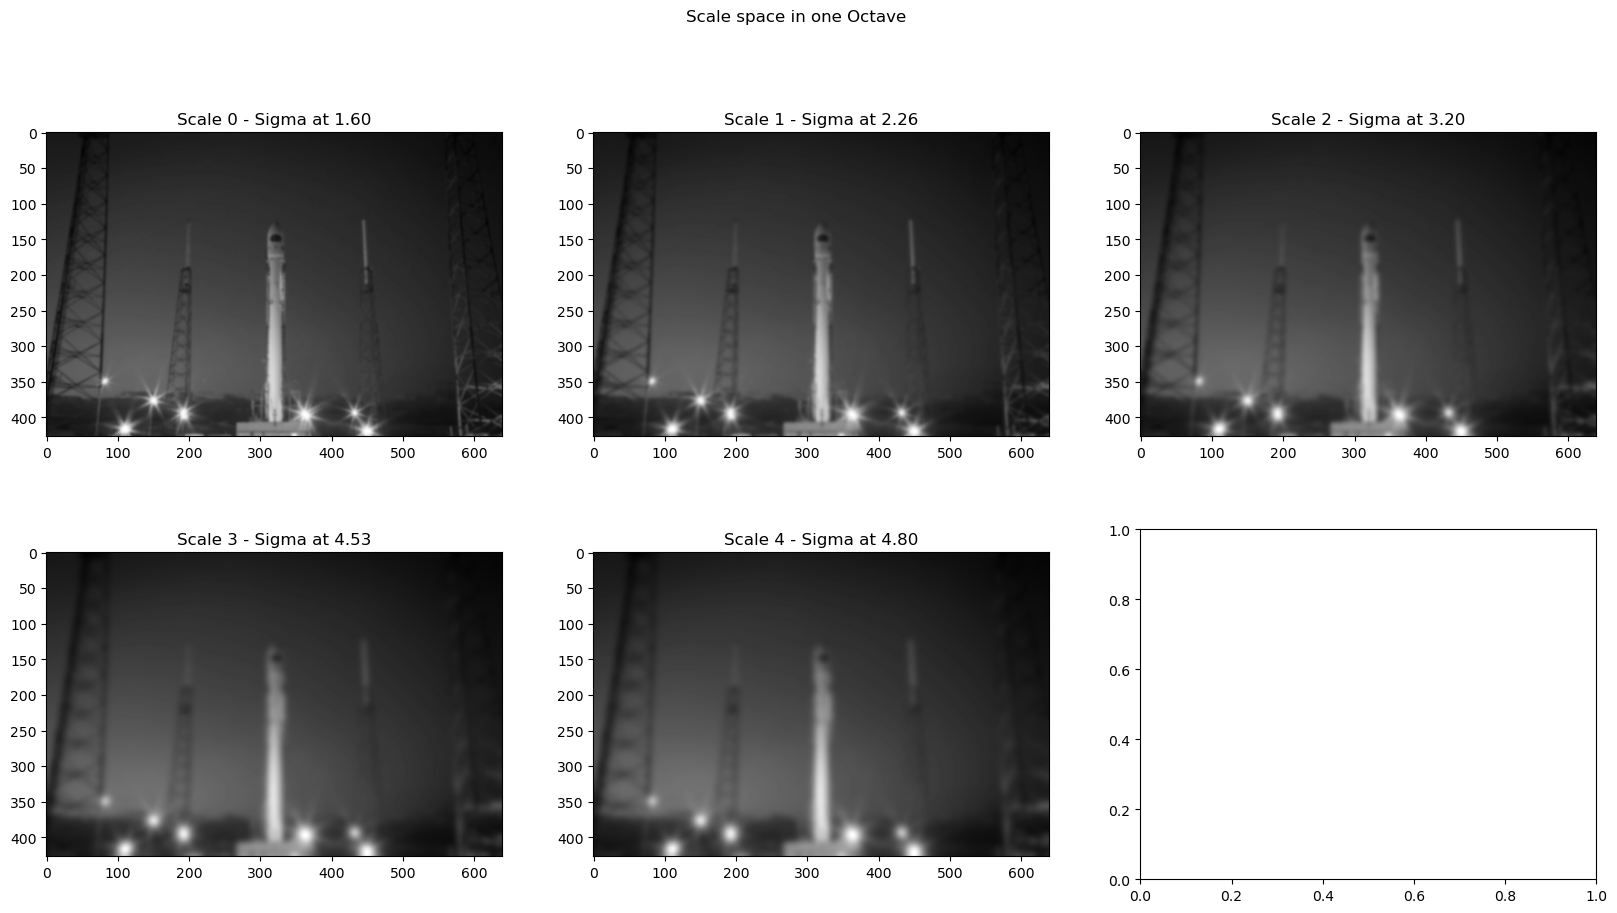

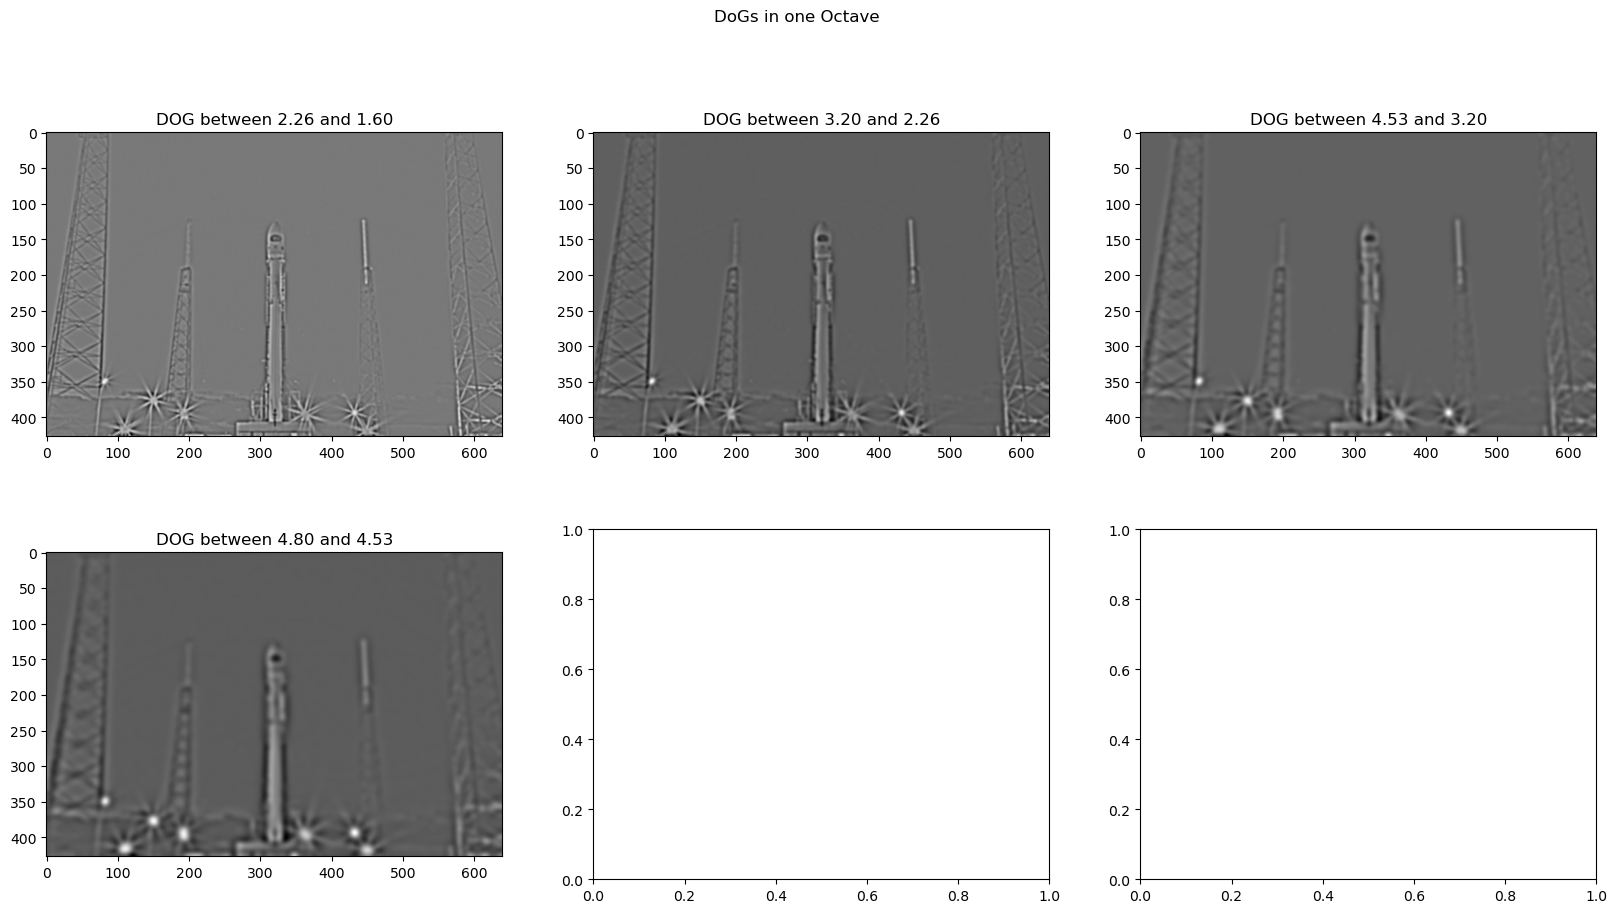

<Figure size 2000x2000 with 0 Axes>

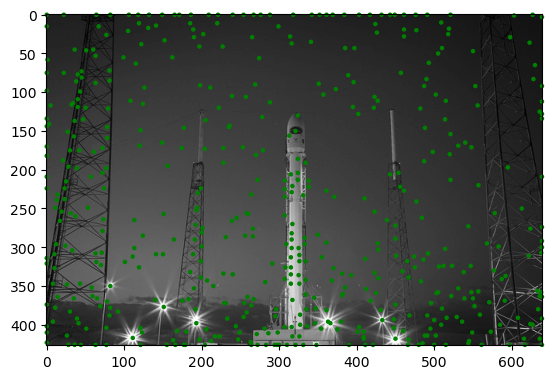

In [7]:
sift.octave_processing(image=sift.image, octave_scale_multiplier=1, sigmas=sift.sigmas_array, visualization=True)

In [15]:
sift.octave_keypoins_global_array[0]

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True]])

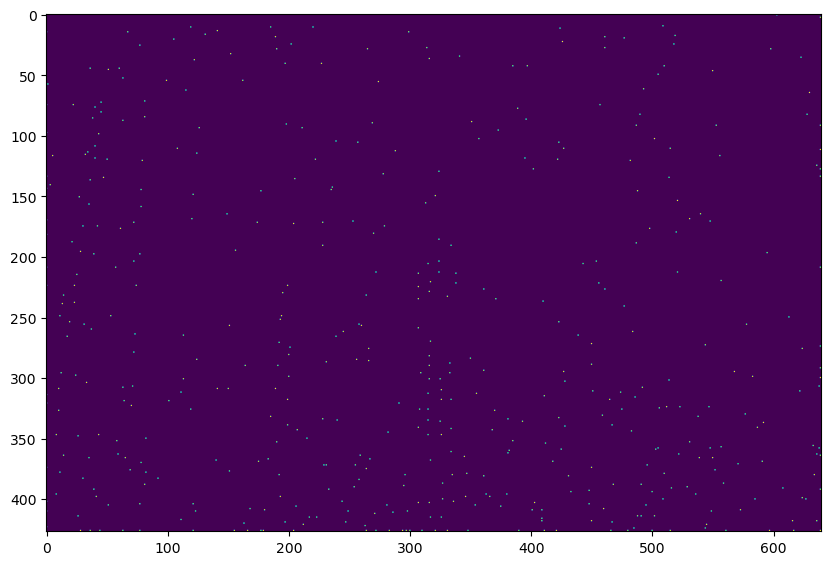

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(sift.octave_keypoins_global_array[0])

/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_3224/806903237.py:2: FutureWarning: `selem` is a deprecated argument name for `binary_dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  plt.imshow(binary_dilation(sift.octave_keypoins_global_array[0],selem=rectangle(3,3)))


Text(0.5, 1.0, 'Detected key points of Octave at native resolution')

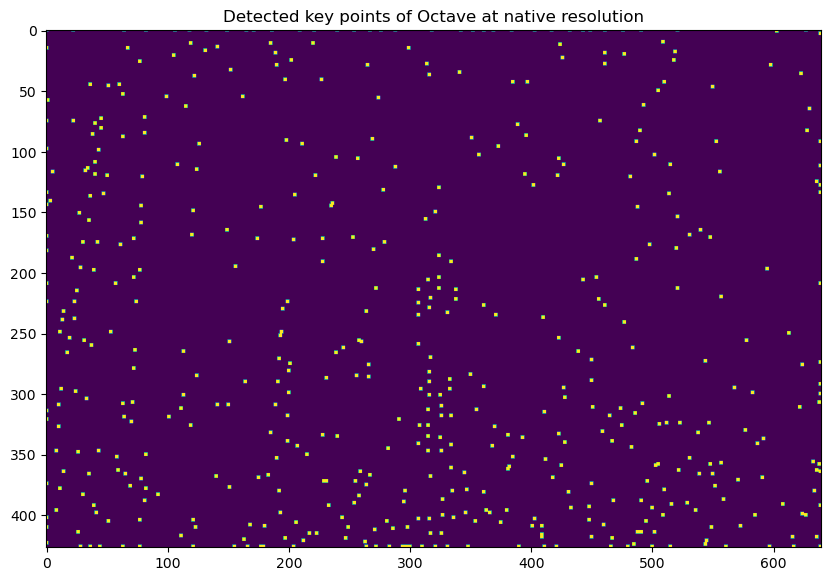

In [19]:
plt.figure(figsize=(10,10))
# For easy visualization
plt.imshow(binary_dilation(sift.octave_keypoins_global_array[0],selem=rectangle(3,3)))
plt.title("Detected key points of Octave at native resolution")

# FILTERring
## Image frame filter
- Student write code

In [25]:
sift.key_point_filter_image_frame(img_shape=img.shape)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_3224/276862385.py:3: FutureWarning: `selem` is a deprecated argument name for `binary_dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  plt.imshow(binary_dilation(sift.octave_keypoins_global_array[0] * sift.key_point_filter_image_frame(img_shape=img.shape),selem=rectangle(3,3)))


Text(0.5, 1.0, 'Detected key points of Octave at native resolution')

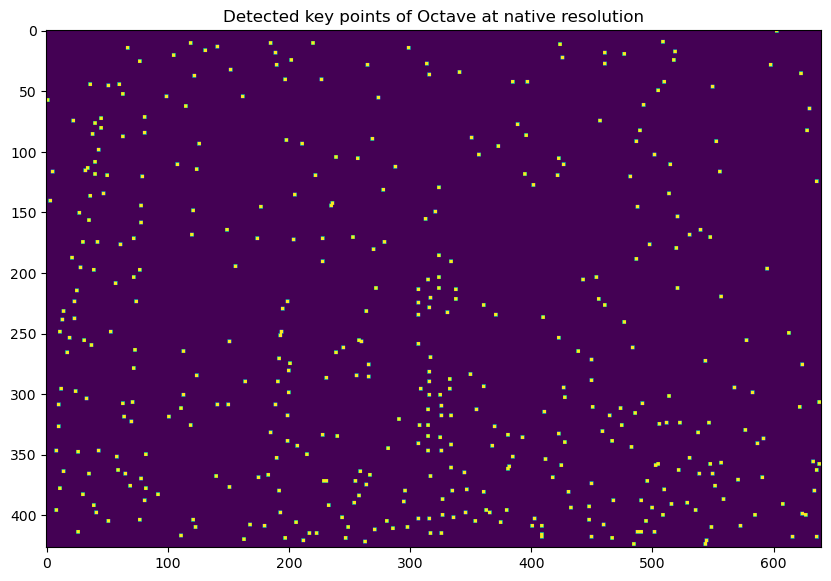

In [26]:
plt.figure(figsize=(10,10))
# For easy visualization
plt.imshow(binary_dilation(sift.octave_keypoins_global_array[0] * sift.key_point_filter_image_frame(img_shape=img.shape),selem=rectangle(3,3)))
plt.title("Detected key points of Octave at native resolution")

## Low contrast remove

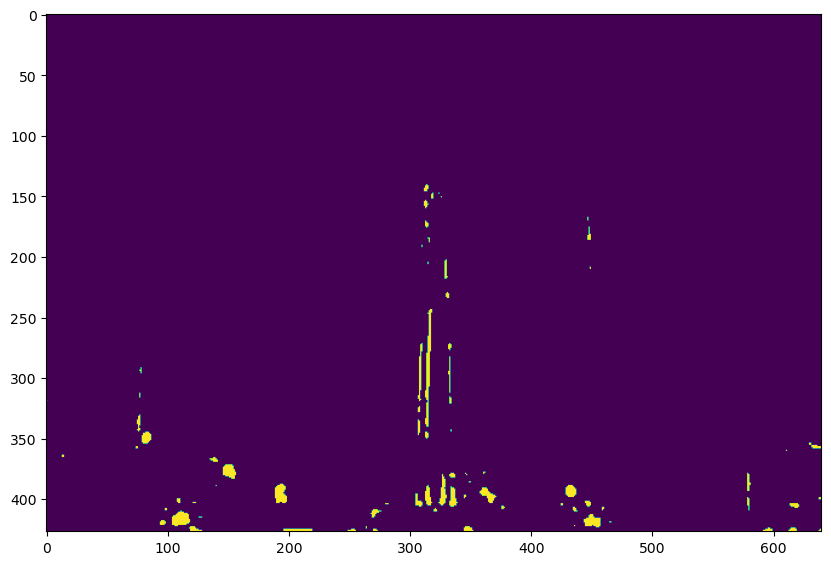

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(sift.key_point_filter_contrast(sift.dog_global_array[0],0.03))

In [29]:
filter_low_contrast = sift.key_point_filter_contrast(sift.dog_global_array[0], 0.03)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True,  True]])

/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_3224/2889295503.py:3: FutureWarning: `selem` is a deprecated argument name for `binary_dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  plt.imshow(binary_dilation(sift.octave_keypoins_global_array[0] *


Text(0.5, 1.0, 'Detected key points of Octave at native resolution')

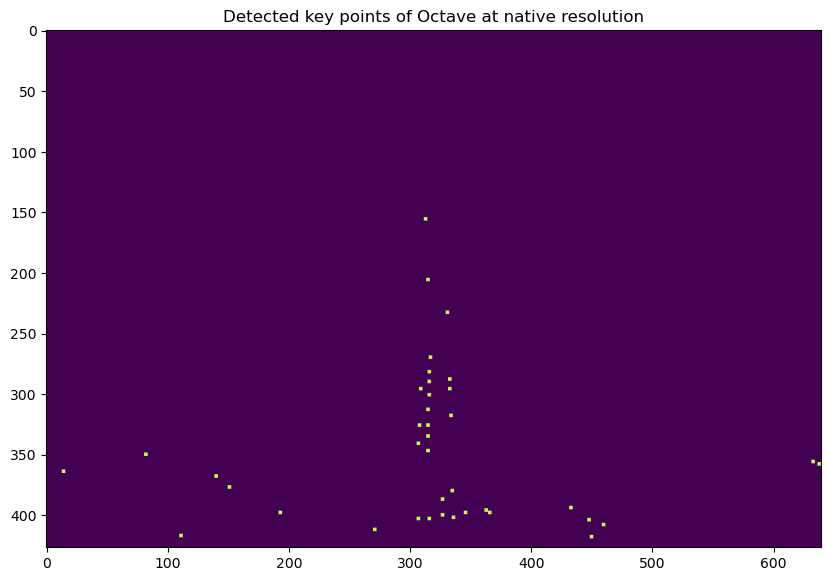

In [37]:
plt.figure(figsize=(10,10))
# For easy visualization
plt.imshow(binary_dilation(sift.octave_keypoins_global_array[0] *
                           sift.key_point_filter_image_frame(img_shape=img.shape) *
                           sift.key_point_filter_contrast(sift.dog_global_array[0], 0.03)
                           ,selem=rectangle(3,3)))
plt.title("Detected key points of Octave at native resolution")